# Region Statistics
In an initial inspection of the dirty images, regions are created around prominent sources. What is the distribution of the source distances from the field centres? The plot below are used to identify a suitable FOV for subsequent imaging and source subtraction.

In [ ]:
import re
import glob
import numpy as np 

import casatools
import astropy.units as u
from astropy.coordinates import SkyCoord

import matplotlib.pyplot as plt

## Get Source Distances from Field Centres

In [ ]:
filelist = glob.glob("/home/pmk46/rds/hpc-work/19A-056/inspect/*/*-regions")

# list to store source distances
dclist = []
reglen = []

for fname in filelist:
    # get field name and corresponding measurement set
    field = re.search("QSO-J[0-9]+[+-][0-9]+", fname)[0]
    ms = f"/home/pmk46/rds/hpc-work/19A-056/ms/{field}.ms"

    # get phase centre of measurement set
    md = casatools.msmetadata()
    md.open(ms)
    pc = md.phasecenter()
    c0 = SkyCoord(ra=pc["m0"]["value"], dec=pc["m1"]["value"], unit=pc["m0"]["unit"])

    # read CRTF regions file
    with open(fname) as file:
        regions = [line.rstrip() for line in file]
    
    print(field, len(regions))
    reglen.append(len(regions))

    for region in regions[1:]:
        # get RA/DEC
        ra = re.search("[0-9]+:[0-9]+:[0-9]+.[0-9]+", region)[0]
        dec = re.search("[+-][0-9]+.[0-9]+.[0-9]+.[0-9]+", region)[0]

        # replace the first two '.' with ':' in dec string
        dec = list(dec)
        dec[4]=":"
        dec[7]=":"

        # get source coordinates
        c = SkyCoord(ra+" "+"".join(dec), unit=(u.hourangle, u.deg))

        # get source distance from field centre in arcmin and add to list
        dc = c0.separation(c).arcmin
        dclist.append(dc)

2023-05-02 12:58:46	INFO	msmetadata_cmpt.cc::open	Performing internal consistency checks on /home/pmk46/rds/hpc-work/19A-056/ms/QSO-J0028+0457.ms...


QSO-J0028+0457 13


2023-05-02 12:58:49	INFO	msmetadata_cmpt.cc::open	Performing internal consistency checks on /home/pmk46/rds/hpc-work/19A-056/ms/QSO-J1512+4422.ms...


QSO-J1512+4422 19


2023-05-02 12:58:52	INFO	msmetadata_cmpt.cc::open	Performing internal consistency checks on /home/pmk46/rds/hpc-work/19A-056/ms/QSO-J0001+0006.ms...


QSO-J0001+0006 21


2023-05-02 12:58:55	INFO	msmetadata_cmpt.cc::open	Performing internal consistency checks on /home/pmk46/rds/hpc-work/19A-056/ms/QSO-J0024+3913.ms...


QSO-J0024+3913 13


2023-05-02 12:58:58	INFO	msmetadata_cmpt.cc::open	Performing internal consistency checks on /home/pmk46/rds/hpc-work/19A-056/ms/QSO-J0038-1025.ms...


QSO-J0038-1025 29


2023-05-02 12:59:00	INFO	msmetadata_cmpt.cc::open	Performing internal consistency checks on /home/pmk46/rds/hpc-work/19A-056/ms/QSO-J1429-0002.ms...


QSO-J1429-0002 18


2023-05-02 12:59:03	INFO	msmetadata_cmpt.cc::open	Performing internal consistency checks on /home/pmk46/rds/hpc-work/19A-056/ms/QSO-J1509-1749.ms...


QSO-J1509-1749 14


2023-05-02 12:59:06	INFO	msmetadata_cmpt.cc::open	Performing internal consistency checks on /home/pmk46/rds/hpc-work/19A-056/ms/QSO-J0421-2657.ms...


QSO-J0421-2657 24


2023-05-02 12:59:08	INFO	msmetadata_cmpt.cc::open	Performing internal consistency checks on /home/pmk46/rds/hpc-work/19A-056/ms/QSO-J0033-0125.ms...


QSO-J0033-0125 32


2023-05-02 12:59:12	INFO	msmetadata_cmpt.cc::open	Performing internal consistency checks on /home/pmk46/rds/hpc-work/19A-056/ms/QSO-J0100+2802.ms...


QSO-J0100+2802 38


2023-05-02 12:59:14	INFO	msmetadata_cmpt.cc::open	Performing internal consistency checks on /home/pmk46/rds/hpc-work/19A-056/ms/QSO-J1932+7139.ms...


QSO-J1932+7139 38


2023-05-02 12:59:17	INFO	msmetadata_cmpt.cc::open	Performing internal consistency checks on /home/pmk46/rds/hpc-work/19A-056/ms/QSO-J1629+2407.ms...


QSO-J1629+2407 35


2023-05-02 12:59:19	INFO	msmetadata_cmpt.cc::open	Performing internal consistency checks on /home/pmk46/rds/hpc-work/19A-056/ms/QSO-J1526-2050.ms...


QSO-J1526-2050 15


2023-05-02 12:59:22	INFO	msmetadata_cmpt.cc::open	Performing internal consistency checks on /home/pmk46/rds/hpc-work/19A-056/ms/QSO-J0055+0146.ms...


QSO-J0055+0146 21


2023-05-02 12:59:25	INFO	msmetadata_cmpt.cc::open	Performing internal consistency checks on /home/pmk46/rds/hpc-work/19A-056/ms/QSO-J0001+0000.ms...


QSO-J0001+0000 20


2023-05-02 12:59:27	INFO	msmetadata_cmpt.cc::open	Performing internal consistency checks on /home/pmk46/rds/hpc-work/19A-056/ms/QSO-J0050+3445.ms...


QSO-J0050+3445 29


2023-05-02 12:59:30	INFO	msmetadata_cmpt.cc::open	Performing internal consistency checks on /home/pmk46/rds/hpc-work/19A-056/ms/QSO-J0106-0030.ms...


QSO-J0106-0030 22


2023-05-02 12:59:32	INFO	msmetadata_cmpt.cc::open	Performing internal consistency checks on /home/pmk46/rds/hpc-work/19A-056/ms/QSO-J1525+4303.ms...


QSO-J1525+4303 24


2023-05-02 12:59:35	INFO	msmetadata_cmpt.cc::open	Performing internal consistency checks on /home/pmk46/rds/hpc-work/19A-056/ms/QSO-J0004-0049.ms...


QSO-J0004-0049 31


2023-05-02 12:59:38	INFO	msmetadata_cmpt.cc::open	Performing internal consistency checks on /home/pmk46/rds/hpc-work/19A-056/ms/QSO-J1558-0724.ms...


QSO-J1558-0724 19


2023-05-02 12:59:40	INFO	msmetadata_cmpt.cc::open	Performing internal consistency checks on /home/pmk46/rds/hpc-work/19A-056/ms/QSO-J0045+0901.ms...


QSO-J0045+0901 22


2023-05-02 12:59:43	INFO	msmetadata_cmpt.cc::open	Performing internal consistency checks on /home/pmk46/rds/hpc-work/19A-056/ms/QSO-J1516+4228.ms...


QSO-J1516+4228 26


2023-05-02 12:59:45	INFO	msmetadata_cmpt.cc::open	Performing internal consistency checks on /home/pmk46/rds/hpc-work/19A-056/ms/QSO-J0009+3252.ms...


QSO-J0009+3252 24


2023-05-02 12:59:48	INFO	msmetadata_cmpt.cc::open	Performing internal consistency checks on /home/pmk46/rds/hpc-work/19A-056/ms/QSO-J1429-0104.ms...


QSO-J1429-0104 7


In [7]:
print(np.max(reglen))

38


## Plot
From the plots below, we see that the source number reaches a minimum at 25 arcminutes from the field centre before rising again due to the first sidelobe. Hence, we should image up to about 30 arcminutes (~6000 cells at a cell size of 0.3 arcsec) and subtract sources at a distance greater than 25 arcminutes from the field centre.

### Distance Distribution

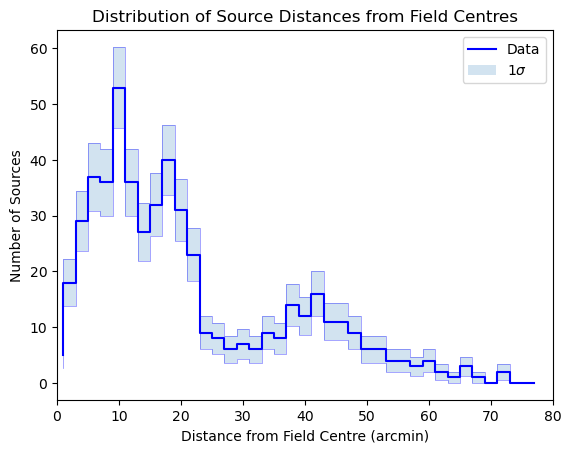

In [3]:
bins = np.arange(0, 80, 2)
hist, binedges = np.histogram(dclist, bins)
bincentres = 0.5 * (binedges[1:] + binedges[:-1])
histerr = np.sqrt(hist)
plt.step(bincentres, hist, color="b", label="Data")
plt.step(bincentres, hist - histerr, color="b", linewidth=0.5, alpha=0.5)
plt.step(bincentres, hist + histerr, color="b", linewidth=0.5, alpha=0.5)
plt.fill_between(bincentres, hist - histerr, hist + histerr, step="pre", alpha=0.2, label=r"$1\sigma$")
plt.title("Distribution of Source Distances from Field Centres")
plt.xlabel("Distance from Field Centre (arcmin)")
plt.ylabel("Number of Sources")
plt.xlim([0, 80])
plt.legend()

### Cumulative Distribution

(0.0, 80.0)

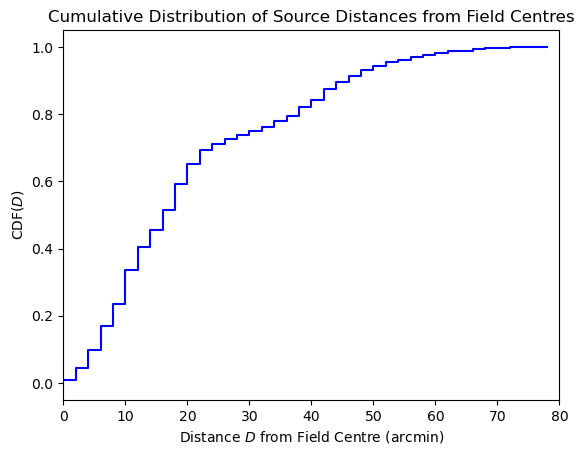

In [4]:
cdist = np.array([np.sum(hist[:i]) for i in range(len(bins))], dtype=float)
cdist /= np.sum(hist)

plt.step(bins, cdist, color="b", label="Data")
plt.title("Cumulative Distribution of Source Distances from Field Centres")
plt.xlabel(r"Distance $D$ from Field Centre (arcmin)")
plt.ylabel(r"CDF($D$)")
plt.xlim([0, 80])